In [ ]:
import os
import pickle
import numpy as np
import re
import emoji
import regex

## Load dataset

In [2]:
def extract_emojis(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [52]:
# load emoji list
fullfile = os.path.expanduser("~/Dropbox/insight/Emoji/"+'mySmileys.p')
with open(fullfile, 'rb') as fp:
    L = pickle.load(fp)
print(L)
print(len(L))
target_names = L

['😀', '😁', '😂', '🤣', '😃', '😄', '😅', '😆', '😉', '😊', '😋', '😎', '😍', '😘', '😗', '😙', '😚', '☺️', '🙂', '🤗', '🤔', '😐', '😑', '😶', '🙄', '😏', '😣', '😥', '😮', '🤐', '😯', '😪', '😫', '😴', '😌', '😛', '😜', '😝', '🤤', '😒', '😓', '😔', '😕', '🙃', '🤑', '😲', '☹️', '🙁', '😖', '😞', '😟', '😤', '😢', '😭', '😦', '😧', '😨', '😩', '😬', '😰', '😱', '😳', '😵', '😡', '😠', '😷', '🤒', '🤕', '🤢', '🤧', '😇', '🤠', '🤡', '🤥', '🤓']
75


In [4]:
class tweet_data:
    pass

# D = tweet_data()
# D.raw_data = rawdata
# D.data = data
# D.raw_target = elist
# D.filesnames = filenames
# D.numTweets = Len

In [36]:
# load data

fullfile = os.path.expanduser("~/Dropbox/insight/Twitter/"+'tweets_75x5k.p')
with open(fullfile, 'rb') as fp:
    D = pickle.load(fp)

len(D.data)

375000

In [5]:
# select subset
target_names = ['😍','😡']


In [9]:
len(D.raw_data)

375000

In [45]:
# make 1D target based only on the single search-emoji
# Len = []
# for keyword in target_names:
#     fullfile = os.path.expanduser("~/Dropbox/insight_datadir/5k/"+'outfile'+keyword+'.p')
#     with open(fullfile, 'rb') as fp:
#         itemlist = pickle.load(fp)
#         Len.append(len(itemlist))
    
# numTweets = 5000
numEmojis = len(target_names)
arr = []
for i in range(numEmojis):
    arr.extend([i] * D.numTweets[i]) 
target = np.array(arr, dtype=int)

target.shape

(375000,)

### Format Tweet dataset; split training/testing


In [61]:
# this is like a struct
class tweet_train:
    pass

T = tweet_train()
T.target_names = target_names
T.data = D.data
T.filenames = D.filesnames
T.target = target


In [8]:
fullfile = os.path.expanduser("~/Dropbox/insight/Twitter/"+'tweet_train_2x5k.p')
with open(fullfile, 'rb') as fp:
    T = pickle.load(fp)


In [53]:
T.target_names = target_names
print(T.target_names[T.target[0]])

😀


In [62]:
# Split the dataset in training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    T.data, T.target, test_size=0.2)

In [65]:
len(y_test)

75000

## Training a classifier 2: Perceptron

In [47]:
# TASK: Build a vectorizer that splits strings into sequence of 1 to 3
# characters instead of word tokens
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char',
#                              use_idf=False)
vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='word',
                             use_idf=True)

In [48]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf
clf = Pipeline([
    ('vec', vectorizer),
    ('clf', Perceptron(tol=1e-3)),
])

In [67]:
# TASK: Fit the pipeline on the training set
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vec', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
   ..._jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False))])

In [70]:
# TASK: Predict the outcome on the testing set in a variable named y_predicted
y_predicted = clf.predict(X_test)

In [68]:
len(X_train)

300000

In [71]:
# Print the classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=T.target_names))

             precision    recall  f1-score   support

          😀       0.48      0.63      0.55      1006
          😁       0.56      0.31      0.40      1018
          😂       0.33      0.41      0.37      1004
          🤣       0.69      0.49      0.57       975
          😃       0.77      0.40      0.53      1003
          😄       0.38      0.42      0.40      1012
          😅       0.50      0.48      0.49      1005
          😆       0.48      0.54      0.51      1022
          😉       0.36      0.39      0.38      1041
          😊       0.41      0.45      0.43       978
          😋       0.63      0.46      0.53       975
          😎       0.35      0.53      0.42      1040
          😍       0.65      0.43      0.52      1004
          😘       0.37      0.42      0.39      1007
          😗       0.60      0.52      0.56      1001
          😙       0.30      0.51      0.37       978
          😚       0.66      0.52      0.58      1016
         ☺️       0.51      0.48      0.50   

In [27]:
# from os.path import join, dirname, abspath
# from matplotlib import pyplot
# from matplotlib.cbook import get_sample_data
# from numpy import linspace
# from numpy.core.umath import pi
# from numpy.ma import sin
# # poo-mark came from emojipedia:
# # https://emojipedia-us.s3.amazonaws.com/thumbs/120/apple/96/pile-of-poo_1f4a9.png
# poo_img = pyplot.imread(get_sample_data(join(dirname(abspath(__file__)), "poo-mark.png")))
# x = linspace(0, 2*pi, num=10)
# y = sin(x)
# fig, ax = pyplot.subplots()
# plot = ax.plot(x, y, linestyle="-")
# ax_width = ax.get_window_extent().width
# fig_width = fig.get_window_extent().width
# fig_height = fig.get_window_extent().height
# poo_size = ax_width/(fig_width*len(x))
# poo_axs = [None for i in range(len(x))]
# for i in range(len(x)):
#     loc = ax.transData.transform((x[i], y[i]))
#     poo_axs[i] = fig.add_axes([loc[0]/fig_width-poo_size/2, loc[1]/fig_height-poo_size/2,
#                                poo_size, poo_size], anchor='C')
#     poo_axs[i].imshow(poo_img)
#     poo_axs[i].axis("off")
# fig.savefig("poo_plot.png")

NameError: name '__file__' is not defined

In [24]:
metrics.accuracy_score(y_test, y_predicted)

0.8925

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.


F1 = 2 * (precision * recall) / (precision + recall) 
https://github.com/scikit-learn/scikit-learn/blob/f0ab589f/sklearn/metrics/classification.py#L1363

In [28]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[877  97]
 [131 895]]


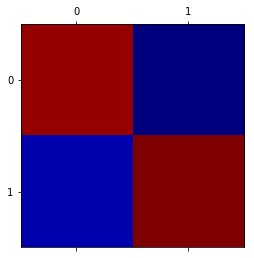

In [29]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

In [26]:
# Predict the result on some short new sentences:
sentences = [
    u'lovely definition: 1. pleasant or enjoyable: 2. beautiful:',
    u'Hate speech is a communication that carries no meaning other than the expression of hatred for some group',
    u'amazing wow love this!!!',
]
predicted = clf.predict(sentences)

In [27]:
output = []
for ii in predicted:
    output.append(T.target_names[ii])
print(output)

['😍', '😡', '😍']


In [ ]:
# save model
fullfile = os.path.expanduser("~/Dropbox/insight_datadir/Webapp_data/"+'clf_0930.p')
with open(fullfile, 'wb') as fp:
    pickle.dump(clf, fp)

In [ ]:
# np.argsort(classifier.predict_proba(X), axis=1)[-5:]

## Multi-layer perceptron (1 hidden layer)

In [32]:
# http://scikit-learn.org/stable/modules/neural_networks_supervised.html
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [39]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [34]:
[coef.shape for coef in clf.coefs_]


[(2, 5), (5, 2), (2, 1)]

In [47]:
print(clf.coefs_[2])

[[-4.53025854]
 [-0.86285329]]


In [37]:
clf.predict_proba([[2., 2.], [-1., -2.]])  

array([[1.96718015e-004, 9.99803282e-001],
       [1.00000000e+000, 4.67017947e-144]])

In [29]:
XV_test = vectorizer.transform(X_test)
XV_test.shape

(2000, 107790)

In [72]:
vectorizer.get_feature_names()

KeyboardInterrupt: 

In [ ]:
docs_new = ['God is love', 'what have you done!','Oh yeah? don''t try to trick me']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf1.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, T.target_names[category]))